# An Analysis of Gospel Music on Mental Health
##### Author: Brandon Hill

In [1]:
import hvplot.pandas  
import matplotlib.pyplot as plt
import pandas as pd 
import panel as pn  
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score

## __Introduction__

In this report, the relationship between an individual's music preferences and their self reported mental health was examined with a specific focus on the Gospel genre across all ages. This report aimed to find if listening to Gospel music is associated with better overall mental health. The genre of Gospel music is specifically examined in this report because of the well known benefits that spirituality can provide to one's health (Harvard T.H. Chan School of Public Health). A dataset titled "Music & Mental Health Survey Results" was chosen from Kaggle for this report (Rasgaitis). This dataset contains survey results to a questionaire about music preferences and self reported mental health. The survey asked participants general questions about their musical tastes, experiences, and listening habits, as well as ranking questions pertaining to their listening frequency of a variety of genres, and their mental health with respect to four conditions: anxiety, depression, insomnia, and OCD. 

Throughout this report, various techniques were implemented to help determine the connection between Gospel music and mental health. Firstly, an interactive bar graph was created and examined to address the association between participants' stated favorite genres and their mental health scores with respect to anxiety, depression, insomnia, and OCD. From there, more focused methods were used where the listening frequency of Gospel music and the participants mental health scores were examined. These more focused methods began by condensing anxiety, depression, insomnia, and OCD scores into a single variable called "Mental Health Score" through PCA technqiue. The new variable was then examined in addition to the individual conditions. Correlation and mutual information were then analyzed between the core features. A scatter plot was then used to examine Gospel listening frequency and mental health across all ages. Finally, the mean Mental Health Score and frequency of listening were examined by a line graph. 

##### Dataset sample: 


In [2]:
df = pd.read_csv('mxmh_survey_results.csv').dropna()
df.head(3)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## __Motivation__

The relationship between mental health and spirituality has been heavily studied, and in addition, music therapy has been found to be an effective means of helping those with mental health conditions. Combining the benefits of spirituality with those of music therapy, it would seem to make sense that Gospel music would have a positive mental effect on its listeners. Studies have previously been conducted where positive associations have been found between listening to religious music and mental health in the older adult population (Bradshaw), as well as studies focusing specifically on singing religious music and positive mental health (Malviya). Even further, studies have been conducted on more specific populations such as African Americans to examine this association (Woods). In the current literature, there seems to be a lack of study on the general population across all age groups. Thus, this report aims to find a more general association between listening to Gospel music and better mental health across all age groups. In finding this association, there is the hope that mental health practitioners may find another avenue of addressing their patients' mental health needs.

## __Contribution__

In this report I contributed to generalizing the association between positive mental health and frequency of listening to Gospel music. I also showed that age does not have a particular relationship with Gospel listening frequency and mental health. Additionally, I show that those which rate Gospel music as their favorite genre have more favorable mental health with respect to anxiety, depression, and OCD. Lastly, I show that across all ages, the mean mental health scores of indiviudals improves, for the most part, with more frequent listening to Gospel music. 

## __Methods__
#### Bar Chart Visualization
An interactive bar chart was used to examine the relationship between participants' favorite music genre and their mental health scores across anxiety, depression, insomnia, and OCD. This bar chart examined the mean values of each mental condition as chosen in the condition selector widget. This method was used to examine some basic results pertaining to chosen favorite genre and reported mental health.


#### PCA
Principal Componet Analysis was used to condense anxiety, depression, insomnia, and OCD into a single variable. Overall, the aim of the study pertained to the overall mental health of the individual, rather than any specific condition. Thus, in using a single variable for mental health, the connection between overall mental health and Gospel music listening is better addressed



#### Correlation and Mutual Information
Correlation was used to draw any linear relationships between the core feautures of interest. The correlation between most of the features was negligible and thus mutual information was then examined to help extract any relation between the features that may not have been captured by correlation.




#### Scatter Plot Visual
A Scatter Plot was used to examine Age, Mental Health Score, and Gospel music listening frequency. This visual used age as the x-axis variable, Mental Health Score as the y-axis variable, and Gospel music listening frequency was displayed through the hue of each point.




#### Line Graph Visual
A Line Graph was created to examine the mean Mental Health Score against the listening frequency of Gospel music. The x-axis variable was listening frequency and the y-axis variable was the mean Menatal Health Score.

## __Main Results__

#### __Interactive Bar Chart for Favorite Genre and Mean Condition Score__

In [3]:
def visualize_data(selections):
    updated_plot = (
        df_compare_genres
        .hvplot.bar(
            x= 'Fav genre', 
            xlabel = 'Favorite Genre',
            y= selections[0],
            rot = 90,
            title ='Favorite Genre and Mean Condition Score',
            fontsize = {'title': '14pt'}
        )
    )
    return updated_plot

df_compare_genres = df
df_compare_genres = df_compare_genres.groupby(['Fav genre'])[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()
label_selector = pn.widgets.MultiSelect(name="Condition Selector", options=['Anxiety', 'Depression', 'OCD', 'Insomnia'], value=['Anxiety'])
interaction = pn.interact(visualize_data, selections=label_selector)
interaction

BokehModel(combine_events=True, render_bundle={'docs_json': {'bd0878e4-4817-4a78-bd3d-16a69fa3757e': {'version…

#### _Result:_
This interactive visual showed that those who rate Gospel music as their favorite genre have seemingly better overall mental health. People who chose Gospel music as their favorite genre were among the lowest quartile for mean anxiety score. Additionally, the mean of those who chose Gospel music as their favorite genre was the lowest with respect to depression and OCD. An outlying result for those who chose Gospel music as their favorite genre was that they scored highest against all other genres for insomnia. Ultimately, it appeared that those who chose Gospel music for their favorite genre were more likely to rate their mental health as better, except when relating to insomnia. A possible shortcoming of these results is that the population size of those who rate Gospel music as their favorite genre is only 6 individuals.

#### __PCA For Condensing Mental Conditions Into Single Variable__

In [4]:
# create PCA for a standard mental health score encompassing depress, anxiety, insomnia, and ocd
df_pca = df[['Age', 'Frequency [Gospel]', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
df_features = df_pca[['Anxiety', 'Depression', 'Insomnia', 'OCD']].to_numpy()
pca_model = PCA(n_components=4, svd_solver='full')
pca_model.fit(df_features)
pca_features = pca_model.transform(df_features)
df_pca[['Mental Health Score']] = pca_features[:, :1]

/var/folders/dt/1jf7n_ld6mjchpv59jdywc180000gn/T/ipykernel_65835/651468039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca[['Mental Health Score']] = pca_features[:, :1]


#### _Result:_

In this result we performed PCA and selected the first componet. The goal was to reduce anxiety, depresssion, insomnia, and OCD into just one dimension so that a single variable for overall mental health could be evaluated. This study aimed to find the association between overall mental health and listening to Gospel music, and thus for this study it makes more sense to create a single variable for mental health rating.

#### __Core Features Correlation and Mutual Information__

In [5]:
# replace categorical with numerical for correlation
df_corr = df_pca.replace({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3})
df_corr[['Frequency [Gospel]', 'Age', 'Mental Health Score', 'Anxiety', 'Depression', 'OCD', 'Insomnia']].corr()

/var/folders/dt/1jf7n_ld6mjchpv59jdywc180000gn/T/ipykernel_65835/1590261741.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_corr = df_pca.replace({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3})


,Frequency [Gospel],Age,Mental Health Score,Anxiety,Depression,OCD,Insomnia
Frequency [Gospel],1.000000,0.117733,-0.006956,-0.041904,-0.012001,0.022568,0.016998
Age,0.117733,1.000000,-0.134674,-0.193781,-0.087390,-0.140464,0.007083
Mental Health Score,-0.006956,-0.134674,1.000000,0.758035,0.790405,0.509060,0.702730
Anxiety,-0.041904,-0.193781,0.758035,1.000000,0.527950,0.339262,0.275013
Depression,-0.012001,-0.087390,0.790405,0.527950,1.000000,0.158990,0.372675
OCD,0.022568,-0.140464,0.509060,0.339262,0.158990,1.000000,0.198866
Insomnia,0.016998,0.007083,0.702730,0.275013,0.372675,0.198866,1.000000


In [6]:
print('MI between Gospel Listening Frequency and Depression:\n', mutual_info_score(df_pca['Frequency [Gospel]'], df_pca['Depression']))
print('MI between Gospel Listening Frequency and Anxiety:\n', mutual_info_score(df_pca['Frequency [Gospel]'], df_pca['Anxiety']))
print('MI between Gospel Listening Frequency and OCD:\n', mutual_info_score(df_pca['Frequency [Gospel]'], df_pca['OCD']))
print('MI between Gospel Listening Frequency and Insomnia:\n', mutual_info_score(df_pca['Frequency [Gospel]'], df_pca['Insomnia']))
print('MI between Gospel Listening Frequency and Mental Health Score:\n', mutual_info_classif(df_pca['Mental Health Score'].to_frame(), df_pca['Frequency [Gospel]']))

MI between Gospel Listening Frequency and Depression:
 0.021050254103264835
MI between Gospel Listening Frequency and Anxiety:
 0.03774797004152311
MI between Gospel Listening Frequency and OCD:
 0.02298917860760845
MI between Gospel Listening Frequency and Insomnia:
 0.036036898638323225
MI between Gospel Listening Frequency and Mental Health Score:
 [0.01848329]


/Users/brandonhill/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/brandonhill/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/brandonhill/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/brandonhill/.pyenv/versions/3.12.1/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete 

#### _Result:_ 

In performing correlation against the core variables of interest, it is noted that there is a weak correlation among all of the variables. Age and frequency of listening to Gospel music seem to have the strongest correlation, yet the value is still minimal. Since correlation examines only linear relationships, mutual information was used to compare the amount of mutual information between the core features and listening frequency. Again, there did not appear to be a signifigant amount of mutual information between listening frequency and the other variables. Somewhat notably, the largest amount of mutual information was shared between listening frequency and anxiety.

#### __Scatter Plot of Age vs Mental Health Score vs Gospel Listening Frequency__

Text(0.5, 1.0, 'Age vs Mental Health Score vs Gospel Listening Frequency')

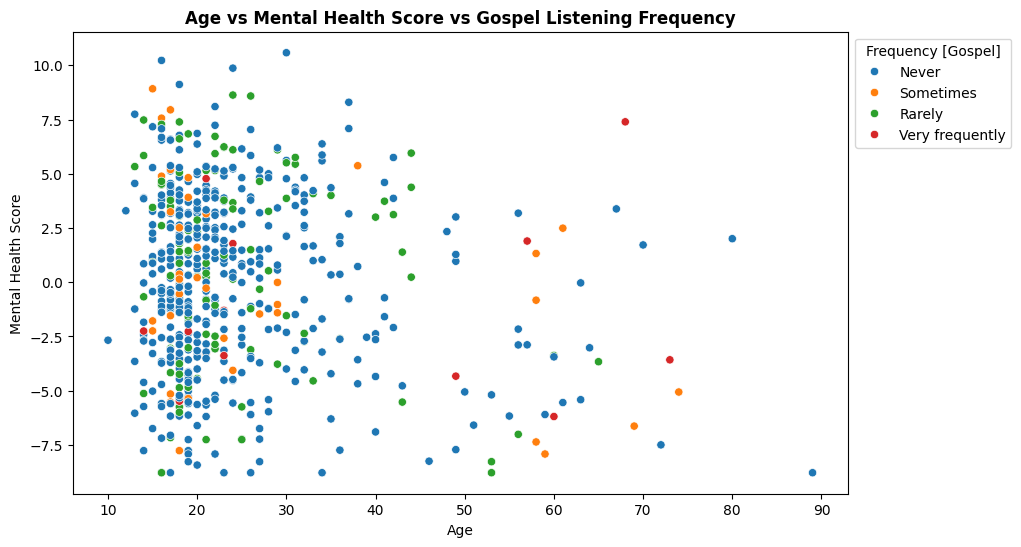

In [7]:
fig, ax = plt.subplots(1, figsize = (10,6))
ax = sns.scatterplot(x = df_pca['Age'], y = df_pca['Mental Health Score'], hue = df_pca['Frequency [Gospel]'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Age vs Mental Health Score vs Gospel Listening Frequency', weight='bold')

#### _Result_:

In this result we can again see that there seems to be little association between age, mental health score, and listening frequency. From this we can see that age does not seem to play a significant role in listening frequency or mental health score. Thus, in any conclusions drawn amongst these variables, the conclusions can be assumed to hold valid across all ages.

#### __Line Chart Gospel Listening Frequency vs Mean Mental Health Score (PCA)__

Text(0.5, 1.0, 'Gospel Listening Frequency vs Mean Mental Health Score (PCA)')

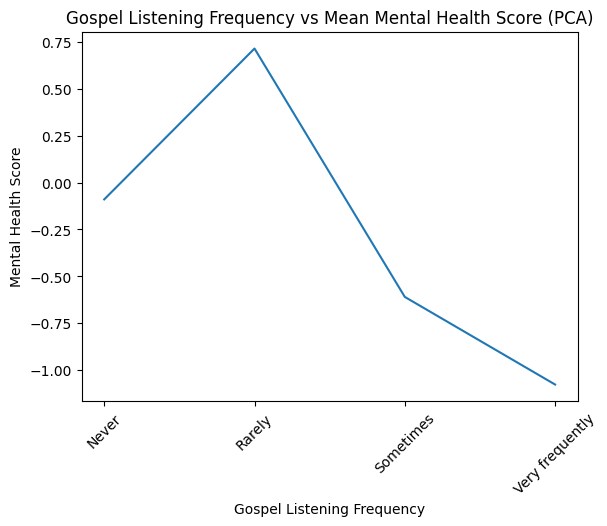

In [8]:
df_pca_grouped = df_pca.groupby(['Frequency [Gospel]'])[['Mental Health Score']].mean().reset_index()
x = df_pca_grouped['Frequency [Gospel]']
y = df_pca_grouped['Mental Health Score']

plt.plot(x,y)
plt.xlabel('Gospel Listening Frequency')
plt.xticks(rotation=45)
plt.ylabel('Mental Health Score')
plt.title("Gospel Listening Frequency vs Mean Mental Health Score (PCA)")

#### _Result:_

From this line graph it can be seen that the mean mental health score appears to worsen between "never" and "Rarely" listening to gospel music. Yet, as listening frequency increases from "Rarely" to "Very frequently", the mental health score on average improves. Thus, knowing that age seems to play little role, it can be concluded that more frequent listening of Gospel music can help to improve one's self rated mental health across all ages.

## __Conclusion__
This report has shown that as the frequency of listening to Gospel music increases, the average mental health score of a population improves. This improvement does not seem to have any bias toward a particular age group. That is, these results seem to not be associated to age and may be generalized to all ages. Thus, this report has contributed to the greater body of literature on mental health, music therapy, and spirituality. This report has shown that an increased listening frequency of Gospel music is associated with improved mental health for all ages. With these insights, further study may be conducted to find a causal relationship between Gospel music and mental health. And in addition, further research may aim at observing the relationship between specific mental health conditions (anxiety, depression, insomnia, and OCD) and Gospel music.

## __References__
* Bradshaw, Matt, et al. “Listening to religious music and Mental Health in later life.” The Gerontologist, vol. 55, no. 6, 15 Apr. 2014, pp. 961–971, https://doi.org/10.1093/geront/gnu020. 

* Malviya, Shikha, et al. “Evidence of religious/spiritual singing and movement in Mental Health: A Systematic Review.” Complementary Therapies in Clinical Practice, vol. 47, May 2022, p. 101567, https://doi.org/10.1016/j.ctcp.2022.101567. 


* Rasgaitis, Catherine. “Music & Mental Health Survey Results.” Kaggle, 21 Nov. 2022, www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?resource=download. 

* “Spirituality Linked with Better Health Outcomes, Patient Care.” Harvard T.H. Chan School of Public Health, 12 Apr. 2024, www.hsph.harvard.edu/news/press-releases/spirituality-better-health-outcomes-patient-care/. 

* Woods, Tejon. Use of Gospel Music to Reduce Anxiety Among African Americans, https://www.proquest.com/docview/2745079344. 